## What I Find
I use the groupby and mean filter to get the mean obesity per neighborhood. I then only print the bottom 5 so that I have a clear understanding of the best neighborhoods.

In [2]:
import pandas as pd
import geopandas
%matplotlib inline

In [31]:
# import dataset
cca = pd.read_csv("trees.csv")
#### filter to important info
#cc0=cca.fillna(0)
best = cca.groupby("neighborhood").mean()['overall_benefits_dollar_value']
#best.replace("overall_benefits_dollar_value", 'NaN',0)
best.sort_values(ascending=True).head(8)

neighborhood
Troy Hill                43.015155
South Shore              45.616670
Polish Hill              65.607477
Central Lawrenceville    66.689438
Strip District           69.347687
Arlington                71.204809
Bedford Dwellings        72.150048
West Oakland             76.122696
Name: overall_benefits_dollar_value, dtype: float64

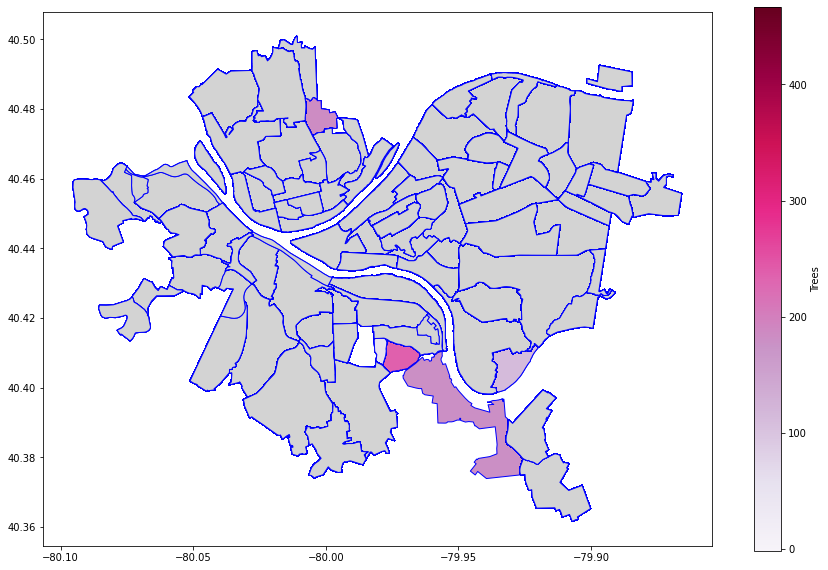

In [29]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
NBCT_map = neighborhoods.merge(cca, how='left', left_on='hood', right_on='neighborhood')
NBCT_map.plot(column='overall_benefits_dollar_value', # set the data to be used for coloring
               cmap='PuRd',              # choose a color palette
               edgecolor="blue",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Trees"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )